## 1. Importing Required External & Internal Libraries

In [1]:
# Imports
import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from collections import defaultdict

In [2]:
import sys
sys.path.append('../framework')
from framework import *

## 2. Preparing the Dataset in a Pandas DataFrame

In [3]:
item_train = pd.read_csv('./data/anime-dataset-2023.csv', delimiter=',')
item_train.head()

,anime_id,Name,English name,Other name,Score,Genres,Synopsis,Type,Episodes,Aired,...,Studios,Source,Duration,Rating,Rank,Popularity,Favorites,Scored By,Members,Image URL
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,8.75,"Action, Award Winning, Sci-Fi","Crime is timeless. By the year 2071, humanity ...",TV,26.0,"Apr 3, 1998 to Apr 24, 1999",...,Sunrise,Original,24 min per ep,R - 17+ (violence & profanity),41.0,43,78525,914193.0,1771505,https://cdn.myanimelist.net/images/anime/4/196...
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,8.38,"Action, Sci-Fi","Another day, another bounty—such is the life o...",Movie,1.0,"Sep 1, 2001",...,Bones,Original,1 hr 55 min,R - 17+ (violence & profanity),189.0,602,1448,206248.0,360978,https://cdn.myanimelist.net/images/anime/1439/...
2,6,Trigun,Trigun,トライガン,8.22,"Action, Adventure, Sci-Fi","Vash the Stampede is the man with a $$60,000,0...",TV,26.0,"Apr 1, 1998 to Sep 30, 1998",...,Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,328.0,246,15035,356739.0,727252,https://cdn.myanimelist.net/images/anime/7/203...
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),7.25,"Action, Drama, Mystery, Supernatural",Robin Sena is a powerful craft user drafted in...,TV,26.0,"Jul 3, 2002 to Dec 25, 2002",...,Sunrise,Original,25 min per ep,PG-13 - Teens 13 or older,2764.0,1795,613,42829.0,111931,https://cdn.myanimelist.net/images/anime/10/19...
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,6.94,"Adventure, Fantasy, Supernatural",It is the dark century and the people are suff...,TV,52.0,"Sep 30, 2004 to Sep 29, 2005",...,Toei Animation,Manga,23 min per ep,PG - Children,4240.0,5126,14,6413.0,15001,https://cdn.myanimelist.net/images/anime/7/215...


### 2a. Drop labels that contain word values / unneeded features:

In [4]:
item_train = item_train.drop(columns=['English name', 'Other name', 'Synopsis', 'Type', 'Aired', 'Premiered', 'Status', 'Producers', 'Licensors', 'Studios', 'Source', 'Duration', 'Rating', 'Rank', 'Popularity', 'Favorites', 'Members', 'Image URL'])
item_train.head()

,anime_id,Name,Score,Genres,Episodes,Scored By
0,1,Cowboy Bebop,8.75,"Action, Award Winning, Sci-Fi",26.0,914193.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,"Action, Sci-Fi",1.0,206248.0
2,6,Trigun,8.22,"Action, Adventure, Sci-Fi",26.0,356739.0
3,7,Witch Hunter Robin,7.25,"Action, Drama, Mystery, Supernatural",26.0,42829.0
4,8,Bouken Ou Beet,6.94,"Adventure, Fantasy, Supernatural",52.0,6413.0


### 2b. Extract Unique Genres, Compile into a List of Genres

In [5]:
# Compile all genres into a single list
genres = item_train['Genres'].str.split(', ').explode()

# Get unique genres
genres = genres.unique()

### 2c. One-Hot Encoding for Genres into the DataFrame

NOTE: The dataset contains some genres that have __sensitive / potentiallly sensitive content__.  I believe that AI/ML should be used in an __ethical manner__.

Therefore, __remove__ the genres that contain sensitive / possibly sensitive content. 

In [6]:
# One-Hot Encode
for genre in genres:
    item_train[genre] = item_train['Genres'].apply(lambda x: 1 if genre in x else 0) #lambda to define short function

# Remove original genre label, drop sensitive content
item_train = item_train.drop(columns=["Genres", "Ecchi", "Hentai", "Erotica"])
item_train.head()

,anime_id,Name,Score,Episodes,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,...,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN
0,1,Cowboy Bebop,8.75,26.0,914193.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,Cowboy Bebop: Tengoku no Tobira,8.38,1.0,206248.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Trigun,8.22,26.0,356739.0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,7,Witch Hunter Robin,7.25,26.0,42829.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8,Bouken Ou Beet,6.94,52.0,6413.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Remove sensitive content from genre list
genres = genres[~np.isin(genres, ["Ecchi", "Hentai", "Erotica"])]
print(genres)


['Action' 'Award Winning' 'Sci-Fi' 'Adventure' 'Drama' 'Mystery'
 'Supernatural' 'Fantasy' 'Sports' 'Comedy' 'Romance' 'Slice of Life'
 'Suspense' 'Gourmet' 'Avant Garde' 'Horror' 'Girls Love' 'Boys Love'
 'UNKNOWN']


In [8]:
# Remove Name from item_train dataset because we don't want to feed that in the NN, just there to see the initial df
item_train = item_train.drop(columns=["Name"])

### 2d. Replace all 'UNKNOWN' values in `Scored By` and `Episodes` Columns
In addition, convert any numeric values read by the code as a String to be numeric so it can be computed.

In [9]:
contains_unknown_scoredby = item_train['Scored By'].str.contains('UNKNOWN')
contains_unknown_episodes = item_train['Episodes'].str.contains('UNKNOWN')
contains_unknown_score = item_train['Score'].str.contains('UNKNOWN')

print(contains_unknown_scoredby)
print(contains_unknown_episodes)
print(contains_unknown_score)

0        False
1        False
2        False
3        False
4        False
         ...  
24900     True
24901     True
24902     True
24903     True
24904     True
Name: Scored By, Length: 24905, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
24900    False
24901    False
24902    False
24903    False
24904    False
Name: Episodes, Length: 24905, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
24900     True
24901     True
24902     True
24903     True
24904     True
Name: Score, Length: 24905, dtype: bool


In [10]:
# Replace `UNKNOWN` across item DataFrame
item_train = item_train.replace('UNKNOWN', 0)
item_train = item_train.replace('NaN', 0)

In [11]:
# Filter for string values
string_values = item_train['Scored By'].dropna().apply(lambda x: x if isinstance(x, str) else None)

# Drop the None values
string_values = string_values.dropna()

print(string_values)

0        914193.0
1        206248.0
2        356739.0
3         42829.0
4          6413.0
           ...   
24590       129.0
24635       152.0
24729       114.0
24831       320.0
24856       194.0
Name: Scored By, Length: 15692, dtype: object


In [12]:
# Convert 'Scored By' and 'Episode' to numeric, handling non-numeric values
item_train['Scored By'] = pd.to_numeric(item_train['Scored By'], errors='coerce')
item_train['Episodes'] = pd.to_numeric(item_train['Episodes'], errors='coerce')
item_train['Score'] = pd.to_numeric(item_train['Score'], errors='coerce')

# Filter for string values
string_values = item_train['Scored By'].dropna().apply(lambda x: x if isinstance(x, str) else None)

# Drop the None values
string_values = string_values.dropna()

print(item_train.isnull().sum())
print(string_values)

anime_id         0
Score            0
Episodes         0
Scored By        0
Action           0
Award Winning    0
Sci-Fi           0
Adventure        0
Drama            0
Mystery          0
Supernatural     0
Fantasy          0
Sports           0
Comedy           0
Romance          0
Slice of Life    0
Suspense         0
Gourmet          0
Avant Garde      0
Horror           0
Girls Love       0
Boys Love        0
UNKNOWN          0
dtype: int64
Series([], Name: Scored By, dtype: object)


We'll also load a y_train (true values) from the user's rating to train the neural network with. This allows us to compute losses (MSE).

In [13]:
print(item_train.shape)
y_train = item_train['Score']
print(y_train.shape)

(24905, 23)
(24905,)


## Repeat Step 2's process for the user_train

NOTE: I separated these two loading processes because user_train data is significantly larger than anime_data

In [14]:
user_train = pd.read_csv("./data/users-score-2023.csv")
user_original = user_train #Store the original dataset
user_train.head()

,user_id,Username,anime_id,Anime Title,rating
0,1,Xinil,21,One Piece,9
1,1,Xinil,48,.hack//Sign,7
2,1,Xinil,320,A Kite,5
3,1,Xinil,49,Aa! Megami-sama!,8
4,1,Xinil,304,Aa! Megami-sama! Movie,8


Once again, drop unnecessary features / qualitative descriptions from the dataset for user_train:

In [15]:
user_train = user_train.drop(columns=["Username", "Anime Title"])
user_train.head()

,user_id,anime_id,rating
0,1,21,9
1,1,48,7
2,1,320,5
3,1,49,8
4,1,304,8


In [16]:
# Replace UNKNOWN values in the user_train to avoid numeric exceptions
user_train = user_train.replace('UNKNOWN', 0)
y_train = y_train.replace('UNKNOWN', 0)

## 4. Comparison of One-Hot Encoded Genres vs. User Preference Rating (Weighted Average)

What we use to compare the two vectors is a weighted average of the user which will give a more accurate prediction of A's genre preference and the one-hot encoded genres. This allows us to make a prediction on how each value of the user's preference vector aligns/compares to the one-hot encoded, or genres, that exist in the anime.

### 4a. Preparation of Dataset:

#### Step 1: Apply Bayesian Average to item_train (Animes) and then Merge Datasets on anime_id
Implementing a Bayesian average of the user ratings can help reflect ratings more accurately in genre preferences.

What does a Bayesian average compute?

- Bayesian average is good for computing a kind of weighted average for ranking data based on a confidence/reliability factor
- For example, if a originally unrated item immediately gets a positive rating of 5 stars, you don't want to make it shoot up in value, as that is inaccurate since there is only 1 rating

In [17]:
# Step 1: Apply Bayesian Average
item_train = Bayesian_Rating(item_train)

In [18]:
# Step 1: Merge datasets on anime_id
merged_df = pd.merge(user_train, item_train, on="anime_id")
merged_df.head()

,user_id,anime_id,rating,Score,Episodes,Scored By,Action,Award Winning,Sci-Fi,Adventure,...,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN,Bayesian Rating
0,1,21,9,8.69,0.0,1226493.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,8.619186
1,1,48,7,6.95,26.0,83009.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.407010
2,1,320,5,6.54,2.0,33411.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5.630107
3,1,49,8,7.29,5.0,26400.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5.926462
4,1,304,8,7.54,1.0,22479.0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,5.933070


#### Step 2: Calculate Weighted Genre Scores for Each User

In [19]:
# Get the list of genre columns using `genre`
# First, mulitply each genre value by the user's rating for that anime, to give weight to the genres of that anime
for genre_column in genres:
    merged_df[genre_column] *= merged_df['Bayesian Rating']

merged_df.head()

,user_id,anime_id,rating,Score,Episodes,Scored By,Action,Award Winning,Sci-Fi,Adventure,...,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN,Bayesian Rating
0,1,21,9,8.69,0.0,1226493.0,8.619186,0.0,0.0,8.619186,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.619186
1,1,48,7,6.95,26.0,83009.0,0.000000,0.0,0.0,6.407010,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407010
2,1,320,5,6.54,2.0,33411.0,5.630107,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.630107
3,1,49,8,7.29,5.0,26400.0,0.000000,0.0,0.0,0.000000,...,5.926462,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.926462
4,1,304,8,7.54,1.0,22479.0,0.000000,0.0,0.0,0.000000,...,5.933070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.933070


#### Step 3: Apply Weighted Average with Bayesian Ratings

In [20]:
user_genre_scores = weighted_average(merged_df, genres) # Get the user_genre_scores

#### Step 4: Append Average Genre Scores to User Dataset

In [21]:
# Append the current user_items with the new inferred genre scores, without duplicating
user_train = pd.merge(user_train[['user_id']].drop_duplicates(), user_genre_scores, on='user_id') 

# Ordered list
user_train = user_train.reset_index(drop=True)
print(user_train.shape)
print(y_train.shape)
user_train.head()

(270033, 20)
(24905,)


,user_id,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN
0,1,3.038131,1.120823,1.772458,1.798110,2.405662,0.631593,0.958510,1.508028,0.486404,2.372774,2.373327,0.344604,0.407779,0.021713,0.180737,0.402367,0.010326,0.000000,0.000000
1,4,3.397572,0.323196,1.262660,1.102410,1.554629,1.011652,1.566381,1.855600,0.339982,1.858365,1.803661,0.202683,0.234407,0.064220,0.000000,0.418753,0.000000,0.077735,0.075333
2,9,3.809706,0.716667,1.913819,1.841969,2.416142,0.223892,1.167979,1.656381,0.219102,3.057448,2.747099,0.055230,0.164041,0.000000,0.164041,0.537301,0.078627,0.000000,0.000000
3,20,4.535397,1.651167,1.528931,3.426816,1.953919,0.833883,1.068402,3.076587,0.491127,1.501018,1.027209,0.219422,0.739293,0.054257,0.075937,0.409882,0.000000,0.000000,0.000000
4,23,5.129297,0.443470,1.917877,1.836391,1.338258,0.754057,0.864227,2.408736,0.665953,1.670143,0.900626,0.055477,0.308702,0.033708,0.035319,0.339052,0.017060,0.000000,0.027920


### Step 5: Scaling of Shapes
An issue that we currently have in our dataset is that for the model to be trained on the same y_train, all trains require the same amount of examples -- this allows us to initialize parameters and spread into minibatches. Right now, m of item_train = m of y_train, but now we need it to also = m of user_train.

In [22]:
user_train = user_train[:y_train.shape[0]]
print(user_train.shape)
user_train.head()

(24905, 20)


,user_id,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN
0,1,3.038131,1.120823,1.772458,1.798110,2.405662,0.631593,0.958510,1.508028,0.486404,2.372774,2.373327,0.344604,0.407779,0.021713,0.180737,0.402367,0.010326,0.000000,0.000000
1,4,3.397572,0.323196,1.262660,1.102410,1.554629,1.011652,1.566381,1.855600,0.339982,1.858365,1.803661,0.202683,0.234407,0.064220,0.000000,0.418753,0.000000,0.077735,0.075333
2,9,3.809706,0.716667,1.913819,1.841969,2.416142,0.223892,1.167979,1.656381,0.219102,3.057448,2.747099,0.055230,0.164041,0.000000,0.164041,0.537301,0.078627,0.000000,0.000000
3,20,4.535397,1.651167,1.528931,3.426816,1.953919,0.833883,1.068402,3.076587,0.491127,1.501018,1.027209,0.219422,0.739293,0.054257,0.075937,0.409882,0.000000,0.000000,0.000000
4,23,5.129297,0.443470,1.917877,1.836391,1.338258,0.754057,0.864227,2.408736,0.665953,1.670143,0.900626,0.055477,0.308702,0.033708,0.035319,0.339052,0.017060,0.000000,0.027920


#### Step 6: Normalization of `item_train`, `user_train`, and `y_train` Values
The item_train and user_train will be scaled using a self-implemented z-score normalization.

The y_train will be scaled using a self-implemented MinMaxScaler.

In [23]:
item_train = zscore_normalization(item_train, genres)
item_train.head()

,anime_id,Score,Episodes,Scored By,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,...,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN,Bayesian Rating
0,1,8.75,26.0,914193.0,2.065267,10.116336,2.656551,-0.427089,-0.358477,-0.187634,...,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735,8.654271
1,5,8.38,1.0,206248.0,2.065267,-0.098850,2.656551,-0.427089,-0.358477,-0.187634,...,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735,8.014284
2,6,8.22,26.0,356739.0,2.065267,-0.098850,2.656551,2.341431,-0.358477,-0.187634,...,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735,8.008850
3,7,7.25,26.0,42829.0,2.065267,-0.098850,-0.376428,-0.427089,2.789576,5.329519,...,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735,6.261687
4,8,6.94,52.0,6413.0,-0.484199,-0.098850,-0.376428,2.341431,-0.358477,-0.187634,...,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735,4.760508


In [24]:
user_train = zscore_normalization(user_train, genres)
user_train.head()

,user_id,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN
0,1,-0.296178,0.139623,0.130214,-0.353277,0.104333,-0.126123,-0.308930,-0.547542,0.741272,0.016530,0.263735,0.306486,-0.080377,-0.021610,0.045017,-0.028630,-0.203501,-0.202753,-0.155798
1,4,-0.101057,-0.580156,-0.260635,-0.741163,-0.518135,0.292482,0.196577,-0.347228,0.412248,-0.351413,-0.133927,-0.026199,-0.266270,0.271414,-0.382844,-0.003955,-0.264069,0.029500,1.181054
2,9,0.122668,-0.225088,0.238592,-0.328823,0.111998,-0.575172,-0.134735,-0.462043,0.140620,0.506260,0.524652,-0.371849,-0.341717,-0.171295,0.005492,0.174568,0.197119,-0.202753,-0.155798
3,20,0.516606,0.618204,-0.056492,0.554805,-0.226084,0.096684,-0.217543,0.356456,0.751885,-0.607014,-0.675940,0.013041,0.275078,0.202733,-0.203078,-0.017313,-0.264069,-0.202753,-0.155798
4,23,0.839003,-0.471620,0.241703,-0.331933,-0.676393,0.008762,-0.387336,-0.028443,1.144736,-0.486044,-0.764303,-0.371272,-0.186609,0.061074,-0.299232,-0.123978,-0.164006,-0.202753,0.339658


In [25]:
# Min-Max Scaler
y_train_arr = y_train.to_numpy()
y_train_arr = y_train_arr[:, np.newaxis] #Make into 2D array
y_train_arr = MinMaxScaler(y_train_arr, -1, 1)
print(y_train_arr.shape)

(24905, 1)


Convert `item_train` and `user_train` into np arrays:

In [26]:
# Ensure we drop all unneeded values in data before training
pd.options.display.max_columns = None
item_train = item_train.drop(columns=["anime_id", "Score", "Episodes", "Scored By", "Bayesian Rating"])
print(item_train.shape)
item_train.head()

(24905, 19)


,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN
0,2.065267,10.116336,2.656551,-0.427089,-0.358477,-0.187634,-0.252619,-0.520315,-0.178736,-0.634091,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735
1,2.065267,-0.098850,2.656551,-0.427089,-0.358477,-0.187634,-0.252619,-0.520315,-0.178736,-0.634091,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735
2,2.065267,-0.098850,2.656551,2.341431,-0.358477,-0.187634,-0.252619,-0.520315,-0.178736,-0.634091,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735
3,2.065267,-0.098850,-0.376428,-0.427089,2.789576,5.329519,3.958537,-0.520315,-0.178736,-0.634091,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735
4,-0.484199,-0.098850,-0.376428,2.341431,-0.358477,-0.187634,3.958537,1.921911,-0.178736,-0.634091,-0.300526,-0.275336,-0.099057,-0.076791,-0.182646,-0.148025,-0.067512,-0.082657,-0.496735


In [27]:
user_train = user_train.drop(columns=["user_id"])
print(user_train.shape)
user_train.head()

(24905, 19)


,Action,Award Winning,Sci-Fi,Adventure,Drama,Mystery,Supernatural,Fantasy,Sports,Comedy,Romance,Slice of Life,Suspense,Gourmet,Avant Garde,Horror,Girls Love,Boys Love,UNKNOWN
0,-0.296178,0.139623,0.130214,-0.353277,0.104333,-0.126123,-0.308930,-0.547542,0.741272,0.016530,0.263735,0.306486,-0.080377,-0.021610,0.045017,-0.028630,-0.203501,-0.202753,-0.155798
1,-0.101057,-0.580156,-0.260635,-0.741163,-0.518135,0.292482,0.196577,-0.347228,0.412248,-0.351413,-0.133927,-0.026199,-0.266270,0.271414,-0.382844,-0.003955,-0.264069,0.029500,1.181054
2,0.122668,-0.225088,0.238592,-0.328823,0.111998,-0.575172,-0.134735,-0.462043,0.140620,0.506260,0.524652,-0.371849,-0.341717,-0.171295,0.005492,0.174568,0.197119,-0.202753,-0.155798
3,0.516606,0.618204,-0.056492,0.554805,-0.226084,0.096684,-0.217543,0.356456,0.751885,-0.607014,-0.675940,0.013041,0.275078,0.202733,-0.203078,-0.017313,-0.264069,-0.202753,-0.155798
4,0.839003,-0.471620,0.241703,-0.331933,-0.676393,0.008762,-0.387336,-0.028443,1.144736,-0.486044,-0.764303,-0.371272,-0.186609,0.061074,-0.299232,-0.123978,-0.164006,-0.202753,0.339658


In [28]:
item_train_arr = item_train.to_numpy()
print(item_train_arr)

[[ 2.06526698 10.11633575  2.65655096 ... -0.06751238 -0.08265681
  -0.49673544]
 [ 2.06526698 -0.09885002  2.65655096 ... -0.06751238 -0.08265681
  -0.49673544]
 [ 2.06526698 -0.09885002  2.65655096 ... -0.06751238 -0.08265681
  -0.49673544]
 ...
 [ 2.06526698 -0.09885002  2.65655096 ... -0.06751238 -0.08265681
  -0.49673544]
 [-0.4841989  -0.09885002 -0.37642794 ... -0.06751238 -0.08265681
   2.01314407]
 [-0.4841989  -0.09885002 -0.37642794 ... -0.06751238 -0.08265681
   2.01314407]]


In [29]:
user_train_arr = user_train.to_numpy()
print(user_train_arr)

[[-0.29617758  0.13962263  0.13021401 ... -0.20350105 -0.20275294
  -0.15579786]
 [-0.10105663 -0.58015583 -0.26063478 ... -0.26406893  0.02949957
   1.18105424]
 [ 0.1226684  -0.22508792  0.23859198 ...  0.19711948 -0.20275294
  -0.15579786]
 ...
 [ 0.2403867  -0.40908042  0.00895025 ...  0.0474046  -0.20275294
  -0.15579786]
 [ 0.17675689  0.73352087  1.50009785 ... -0.26406893 -0.20275294
  -0.15579786]
 [ 1.96218354  0.94342008  1.69533156 ... -0.26406893 -0.20275294
  -0.15579786]]


#### Part 6: Splitting into Train and Test Sets
Implemented using a self-made train_test_split function:

In [30]:
item_train_arr, item_test_arr = train_test_split(item_train_arr, train_size=0.80, random_state=1, shuffle=True)
user_train_arr, user_test_arr = train_test_split(user_train_arr, train_size=0.80, random_state=1, shuffle=True)
y_train_arr, y_test_arr       = train_test_split(y_train_arr,    train_size=0.80, random_state=1, shuffle=True)
print(f"Item training data shape: {item_train_arr.shape}")
print(f"Item test data shape: {item_test_arr.shape}")

Item training data shape: (19924, 19)
Item test data shape: (4981, 19)


## 5. Building a Deep Learning Neural Network to Compute User and Item Vectors

Here, two neural networks based on the user and the item will be used to compute the properties of the user and the item. Then, by taking the dot product of these two vectors, a comparison/prediction can be made based on these two values.

The Neural Network implemented will be self made.

<figure>
    <center> <img src="./images/RecSysNN.png"   style="width:500px;height:280px;" ></center>
</figure>

In [31]:
# Checking shapes
print("Item: ", item_train_arr.shape)
print("User: ", user_train_arr.shape)

Item:  (19924, 19)
User:  (19924, 19)


In [32]:
# Get the Sequential calculation class
from Sequential import *
sequential = Sequential()

# Get Adam initialization from model
from model import init_Adam

#### Define the Model Function
The model will attempt to implement Adam optimization (inspired by Andrew Ng's DL Course) to try to speed up computational time.

The hyperparameters of choice will be:

beta1 = 0.9 --> dW
beta2 = 0.999 --> dW^2
epsilon = 1 * 10^-8

During testing with mini-batch regular gradient descent, training one epoch took ~2 mins.

<figure>
    <center> <img src="./images/Adam.png"   style="width:500px;height:280px;" ></center>
</figure>

In addition, we will introduce L2 Normalization onto the parameters. Then, a dot product of the two vectors will provide a value that points to the similarity between the two values.

<figure>
    <center> <img src="./images/L2Norm.png"   style="width:500px;height:280px;" ></center>
</figure>


In [33]:
# Model training imports
from model import *
from matplotlib import pyplot as plt

In [34]:
# @Deprecated: Original model for training only a single model, not RecSys
pass

def model(name, X, Y, layer_dimensions, learning_rate = 0.0001, mini_batch_size = 64, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, epochs = 50, print_cost = True, decay = None, decay_rate = 0.1):
    L = len(layer_dimensions) #Number of layers in the neural network
    loss_history = []
    t = 0. #Counter for Adam update    
    seed = 10      
    m = X.shape[0] #Number of training exs
    learning_rate_initial = learning_rate #Initialize the original learning rate

    # Initialize the parameters. layer_dimensions control the input/output of the model
    params = init_params(layer_dimensions)

    # Initialize the cache (as empty dict)
    cache = dict()

    # Initialize Adam optimizer (v, s dicts)
    v, s = init_Adam(params)
    
    # Optimization
    for i in range(epochs):
        
        # Define the minibatches
        seed += 1 #increment the seed so reshuffle different minibatches each time. Therefore different datasets to work with
        minibatches = generate_minibatches(X, Y, mini_batch_size, seed)
        total_loss = 0.

        # Iterate the optimization process for every minibatch
        for minibatch in minibatches:

            # Get the X and Y's from the minibatch -- remember mini-batch repesent shuffled X, Y'set
            (X_minibatch, Y_minibatch) = minibatch

            # Sequential (calculation)
                # X: np.ndarray, Y: np.ndarray, params: dict, 
                # v: dict, s: dict, t: int, learning_rate = None, cache = None,
                # beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8

            a5, cache, loss, updated_params, updated_v, updated_s, updated_t = sequential.Sequential(X=X_minibatch, Y=Y_minibatch, params=params, v=v, s=s, t=t, learning_rate=learning_rate, cache=cache,
            beta1=beta1, beta2=beta2, epsilon=epsilon)

            # Adjust new parameters
            v = updated_v
            s = updated_s
            t = updated_t
            total_loss += loss
            params = updated_params

        avg_loss = total_loss / (m / mini_batch_size)

        # Apply the decay function to adjust the learning_rate
        if decay:
            learning_rate = decay(learning_rate_initial, i, decay_rate)

        # Print the cost every epoch
        if print_cost is True and (i % 5 == 0 or i == 0):
            print(name+" loss at epoch %i: %f" %(i, avg_loss))
            if decay:
                print(f'lr at epoch {i}: {learning_rate}')
        if print_cost is True and (i % 5 == 0 or i == 0):
            loss_history.append(avg_loss)

    # plot the cost
    plt.plot(loss_history)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    # Return the final optimized parameters and output layers for prediction
    return a5, params, loss_history

In [41]:
#Define the full model, basically our tf model.fit function
from model import create_minibatches, init_params, init_Adam
from matplotlib import pyplot as plt

def RecSys_model(X_user, X_item, Y, layer_dims_user, layer_dims_item, learning_rate = 0.01, mini_batch_size = 64, beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8, epochs = 5000, print_cost = True, decay = None, decay_rate = 1):
    L = len(layer_dims_user) #Number of layers in the neural network
    loss_history = []
    t = 0. #Counter for Adam update    
    seed = 10      
    m = X_user.shape[0] #Number of training exs. X_user = X_item
    learning_rate_initial = learning_rate #Initialize the original learning rate (for decay)

    # Initialize the parameters. layer_dimensions control the input/output of the model
    params_u = init_params(layer_dims_user)
    params_i = init_params(layer_dims_item)

    # Initialize Adam optimizer (v, s dicts)
    v_u, s_u = init_Adam(params_u)
    v_i, s_i = init_Adam(params_i)

    # Optimization
    for i in range(epochs):
        
        # Define the minibatches
        seed += 1 #increment the seed so reshuffle different minibatches each time. Therefore different datasets to work with
        minibatches = create_minibatches(X_user, X_item, Y, mini_batch_size, seed)
        total_loss = 0.

        # Iterate the optimization process for every minibatch
        for minibatch in minibatches:

            # Get the X and Y's from the minibatch -- remember mini-batch repesent shuffled X, Y'set
            (X_minibatch_user, X_minibatch_item, Y_minibatch) = minibatch

            # Sequential (calculation)
                # X_u: np.ndarray, X_i: np.ndarray, Y: np.ndarray, params_u: dict, params_i: dict, v_u: dict, v_i: dict, 
                # s_u: dict, s_i: dict, t: float, learning_rate: float, cache_i = dict(), cache_u = dict(),
                # beta1 = 0.9, beta2 = 0.999, epsilon = 1e-8

            params_u, v_u, s_u, params_i, v_i, s_i, y_pred, loss, t = sequential.RecSys_Sequential(
            X_minibatch_user, X_minibatch_item, Y_minibatch, params_u, params_i, v_u, v_i, s_u, s_i, t, learning_rate)

            # Adjust new parameters
            total_loss += loss

        avg_loss = total_loss / m

        # Apply the decay function to adjust the learning_rate
        if decay:
            learning_rate = decay(learning_rate_initial, i, decay_rate)

        # Print the cost every epoch
        if print_cost is True:
            print("Loss at epoch %i: %f" %(i, avg_loss))
            if decay:
                print(f'lr at epoch {i}: {learning_rate}')
        if print_cost is True:
            loss_history.append(avg_loss)

    # plot the cost
    plt.plot(loss_history)
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()
    
    # Return the final optimized parameters and output layers for prediction
    return y_pred, params_u, params_i, loss_history

### Define the layer dimensions for the user and item
Good rule of thumb for picking a neural network architecture:

From: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
𝑁𝑖 = number of input neurons (features).

𝑁𝑜 = number of output neurons.

𝑁𝑠 = number of samples in training data set.

𝛼 = an arbitrary scaling factor usually 2-10. Recommended 2 to prevent overfitting issues.

Some other rules of thumb include:

The number of hidden neurons should be between the size of the input layer and the size of the output layer.
The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
The number of hidden neurons should be less than twice the size of the input layer.
In addition, we will apply a scheduled learning rate decay function to optimize learning. During the first few steps of gradient descent, the model is able to get away with large initial steps & learning rates. Therefore, having learning rate decay to allow us to control a decrease of the lr gives us a way to speed up initial learning epochs while not overshooting in later epochs.

Chosen NN Architecture: [input, 256, 128, 64, 32]

Chosen Epochs = 50

In [42]:
# Specify the layer dimensions (i.e. num of inputs + num of units per layer)
layer_dims_user = [user_train_arr.shape[1], 256, 128, 64, 32]
layer_dims_item = [item_train_arr.shape[1], 256, 128, 64, 32]

#### Training the models using multiprocessing:

In [37]:
pass

# Simultaneously train user and anime NN's using multiprocess
# Models are three layers 
%pip install pathos
from pathos.multiprocessing import ProcessingPool as Pool

Note: you may need to restart the kernel to use updated packages.


In [38]:
pass

# Define the model parameters
user_params = ("user", user_train_arr, y_train_arr, layer_dims_user)
item_params = ("item", item_train_arr, y_train_arr, layer_dims_item)

# Result variables
user_results, item_results = [np.ndarray, dict, list], [np.ndarray, dict, list]

# Define the train_model functions to pass into the Pool
def train_model(name, X, Y, layer_dims):
    a5, params, loss_history = model(name, X, Y, layer_dims, learning_rate = 0.01, epochs=50, decay=schedule_lr_decay)
    return a5, params, loss_history

def train_user_model():
    return train_model("user", user_train_arr, y_train_arr, layer_dims_user)

def train_item_model():
    return train_model("item", item_train_arr, y_train_arr, layer_dims_item)

/var/folders/5d/1rtzndp93j70w52z5fn_d0kr0000gn/T/ipykernel_36196/1868883939.py:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Loss at epoch %i: %f" %(i, avg_loss))


Loss at epoch 0: 1.111564
lr at epoch 0: 0.01
Loss at epoch 1: 0.863892
lr at epoch 1: 0.009990009990009992
Loss at epoch 2: 1.022669
lr at epoch 2: 0.00998003992015968
Loss at epoch 3: 1.137715
lr at epoch 3: 0.009970089730807579
Loss at epoch 4: 1.307413
lr at epoch 4: 0.0099601593625498
Loss at epoch 5: 1.668474
lr at epoch 5: 0.009950248756218907
Loss at epoch 6: 1.926431
lr at epoch 6: 0.009940357852882704
Loss at epoch 7: 1.383486
lr at epoch 7: 0.0099304865938431
Loss at epoch 8: 1.689643
lr at epoch 8: 0.00992063492063492
Loss at epoch 9: 1.670416
lr at epoch 9: 0.009910802775024779
Loss at epoch 10: 1.622200
lr at epoch 10: 0.009900990099009901
Loss at epoch 11: 1.357573
lr at epoch 11: 0.009891196834817014
Loss at epoch 12: 1.551919
lr at epoch 12: 0.009881422924901186
Loss at epoch 13: 1.606784
lr at epoch 13: 0.00987166831194472
Loss at epoch 14: 1.757717
lr at epoch 14: 0.009861932938856016
Loss at epoch 15: 1.731492
lr at epoch 15: 0.009852216748768475
Loss at epoch 16: 1

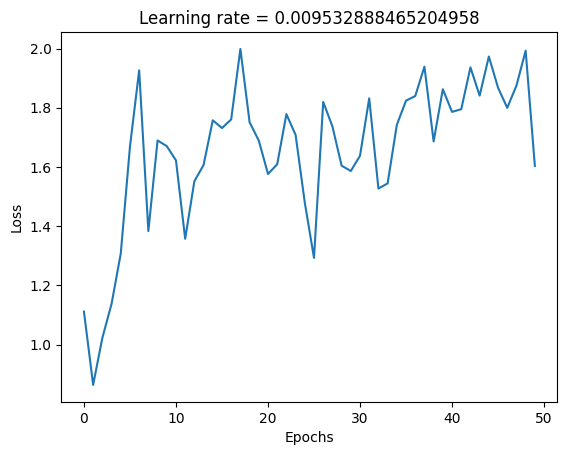

In [43]:
# Model training
prediction, user_params, item_params, loss_history = RecSys_model(user_train_arr, item_train_arr, y_train_arr, layer_dims_user, layer_dims_item, epochs=50, decay=schedule_lr_decay)

In [40]:
pass

# Main function for multiprocessing

def run_model(func): #Avoid pickling errors
    return func()

if __name__ == '__main__':
    # Create the Pool of processes. Use `with` to close the Pool when finished
    with Pool(processes=2) as pool:
        results = pool.map(run_model, [train_user_model, train_item_model])

    # Unpack the results
    user_results = results[0]
    item_results = results[1]

KeyError: 'W5'

In [ ]:
pass

#Further unpack results
user_output, user_trained_params, user_loss_history = user_results[0], user_results[1], user_results[2]
item_output, item_trained_params, item_loss_history = item_results[0], item_results[1], item_results[2]

#### Storing the Trained Models
The parameters of each model is stored using `pickle`. Why not just use `.txt` files to save the user_params and item_params?

- `.pkl` serializes Python objects into a byte stream that can be easily saved to a file or transmitted over a network
- `.pkl` allows serialization of almost any data type (nparray, dict, list) while `.txt` can just store text data. Therefore when reusing, data types of objects can be retained without conversions.
- `.pkl` is stored in binary format which is faster to read/write than text formats

In [ ]:
%pip install pickle
import pickle

In [ ]:
# Store the user_model parameters
with open('user_model.pkl', 'wb') as file:
    pickle.dump(tuple(user_output, user_trained_params, user_loss_history), file)

# Store the item_model parameters
with open('item_model.pkl', 'wb') as file:
    pickle.dump(tuple(item_output, item_trained_params, item_loss_history), file)

#### Loading the Models (if required)

In [ ]:
pass

user_params, item_params = dict(), dict()

# Load the user_model parameters
with open('user_model.pkl', 'rb') as file:
    user_params = pickle.load(file)

# Store the item_model parameters
with open('item_model.pkl', 'rb') as file:
    item_params = pickle.load(file)

## 6. Predictions
We can make a prediction for a new user or an existing user. Since we want to recommend animes to users based on genres they like, we are most likely going to use an algorithm to recommend to new users by having them rate genres on a scale.

To find similar items from our large catalogue, a squared distance measure between items can be used, but that would be for already existing users who have data in the catalogue. This may be a future integration to add to the model.